##  MisinfoMeter: Fake News Prediction Platform




#### import library

In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import itertools

In [75]:
#!pip install pandas

In [76]:
df = pd.read_csv("news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [77]:
df.shape

(6335, 4)

In [78]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [79]:
labels = df.label

In [80]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [81]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df["text"], labels, test_size = 0.2, random_state = 20)
x_train.head()

4741    NAIROBI, Kenya — President Obama spoke out Sun...
2089    Killing Obama administration rules, dismantlin...
4074    Dean Obeidallah, a former attorney, is the hos...
5376      WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028    Some of the biggest issues facing America this...
Name: text, dtype: object

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [83]:
# initilise a Tfidvectorizer
vector = TfidfVectorizer(stop_words='english', max_df=0.7)

In [84]:
# fit and tranform
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [85]:
# initilise a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [86]:
# predicton the tst dataset
from sklearn.metrics import accuracy_score, confusion_matrix

In [87]:
y_pred = pac.predict(tf_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 94.95%


In [55]:
# confusion metrics
conf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[568  36]
 [ 50 613]]


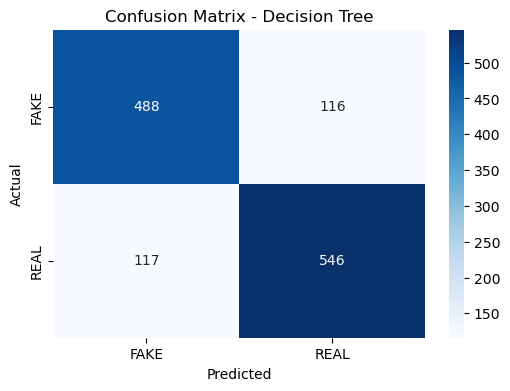

In [62]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Assuming you have already trained and predicted using a Decision Tree classifier
# For example:
# dt_classifier = DecisionTreeClassifier()
# dt_classifier.fit(tf_train, y_train)
# y_pred_dt = dt_classifier.predict(tf_test)

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


In [39]:

# save model
import pickle

In [40]:
filename = 'finalized_model.pkl'
pickle.dump(pac, open(filename, 'wb'))

In [41]:
# save vectorizer
filename = 'vectorizer.pkl'
pickle.dump(vector, open(filename, 'wb'))

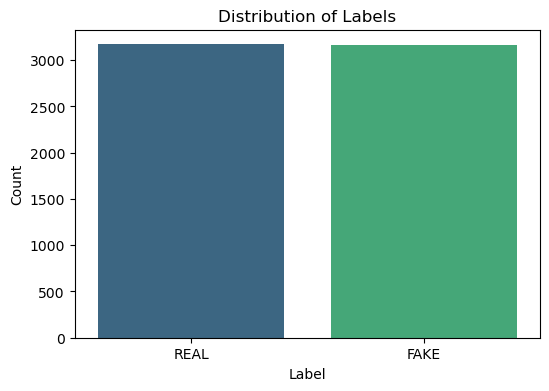

In [45]:
#unique values in each plot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


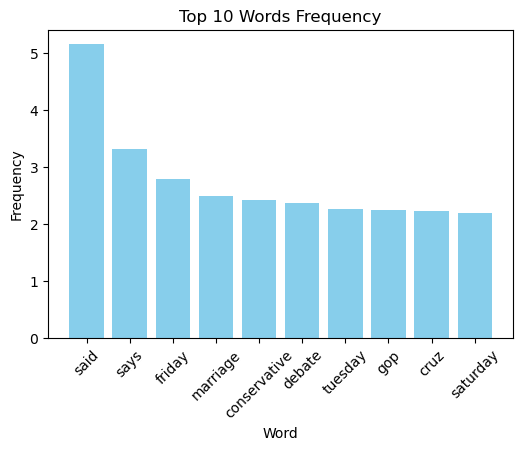

In [63]:
#Bar chart of Top words Frequency
import matplotlib.pyplot as plt

# Retrieve feature names from TfidfVectorizer
feature_names = vector.get_feature_names_out()

# Retrieve coefficients from PassiveAggressiveClassifier
coefficients = pac.coef_.flatten()

# Create DataFrame to store feature names and their corresponding coefficients
word_freq_df = pd.DataFrame({'Word': feature_names, 'Frequency': coefficients})

# Sort DataFrame by frequency in descending order to get top words
top_words = word_freq_df.sort_values(by='Frequency', ascending=False).head(10)

# Plot bar graph
plt.figure(figsize=(6, 4))
plt.bar(top_words['Word'], top_words['Frequency'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Words Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
